#### Table Replication  
Use predefined SQL table copies to partion and cluster new tables

In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import config, h_setup, ds_setup, bq

### TPC-DS

In [4]:
csv_fp_ds = "./results/ds_100GB_01_cardinality.csv"
df_ds = pd.read_csv(csv_fp_ds)

In [5]:
tpl_dir_ds = config.fp_query_templates + config.sep + "bq_ds"

d_ds = []
columns = []
for n in range(1, 100):
    columns.append(f"q{n}")
    query_text = ds_setup.qgen_template(n=n,
                                        templates_dir=tpl_dir_ds,
                                        scale=100,
                                        qual=None,
                                        verbose=False,
                                        verbose_out=False)
    n_c = [query_text.count(x) for x in df_ds.column]
    d_ds.append(n_c)

In [6]:
df_ds_count = pd.DataFrame(d_ds)
df_ds_count.columns = df_ds.table_column.values

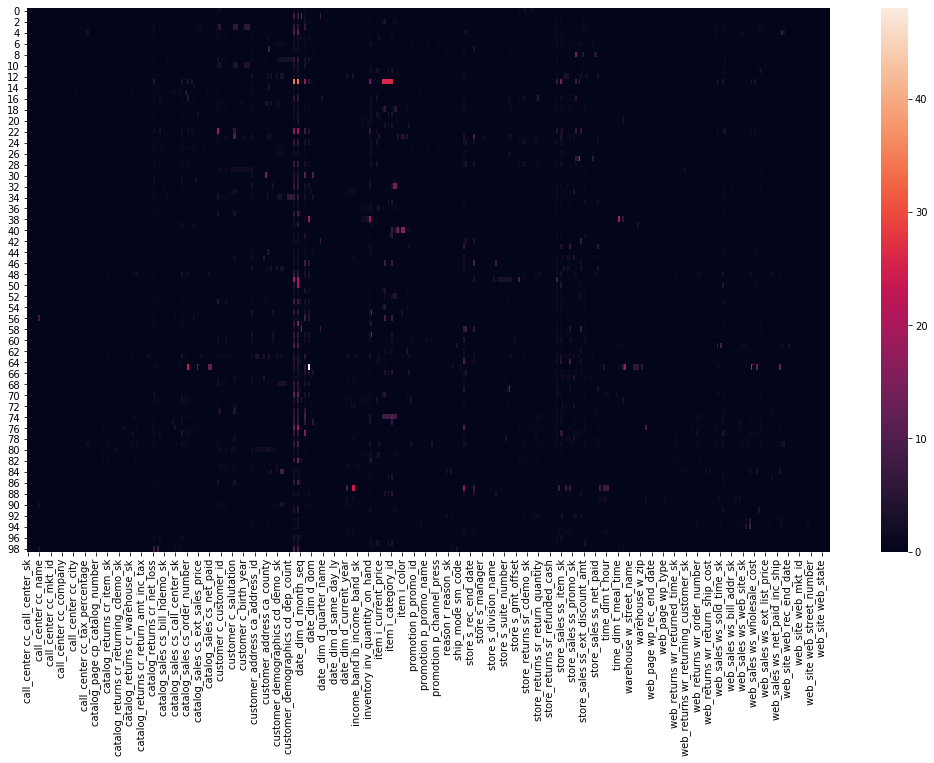

In [7]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
sns.heatmap(df_ds_count, ax=ax);

### TPC-H

In [8]:
csv_fp_h = "./results/h_100GB_01_cardinality.csv"
df_h = pd.read_csv(csv_fp_h)

In [9]:
tpl_dir_h = config.fp_query_templates + config.sep + "bq_h"
d_h = []
columns = []
for n in range(1, 23):
    columns.append(f"q{n}")
    query_text = h_setup.qgen_template(n=n,
                                       templates_dir=tpl_dir_h,
                                       scale=100,
                                       qual=None,
                                       verbose=False,
                                       verbose_out=False)
    n_c = [query_text.count(x) for x in df_h.column]
    d_h.append(n_c)

In [10]:
df_h_count = pd.DataFrame(d_h)
df_h_count.columns = df_h.table_column.values

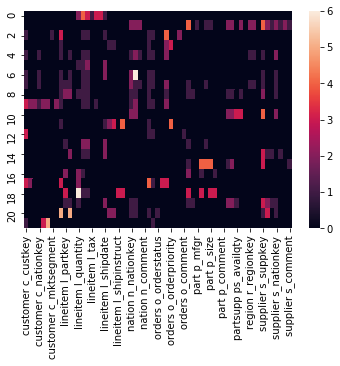

In [11]:
sns.heatmap(df_h_count);